#Del 1
Laste inn pakker og Data

In [1]:
rm(list=ls())

In [2]:
install.packages("feather")
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# Laster inn pakker
library(tidyverse)
library(readr)
library(httr)
library(ggplot2)
library(feather)
library(ggpubr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
# Laster inn filen fra 2022

# Laster ned .zip-filen
file_url_2022 <- "https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/natality/Nat2022us.zip"
dest_file_2022 <- "2022_birth_data.zip"
GET(url = file_url_2022, write_disk(dest_file_2022, overwrite = TRUE))

Response [https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/natality/Nat2022us.zip]
  Date: 2024-03-01 21:25
  Status: 200
  Content-Type: application/x-zip-compressed
  Size: 222 MB
<ON DISK>  /content/2022_birth_data.zipNULL

In [6]:
# Bruker info fra dokumentasjonen til å finne posisjonen til alle kolonner vi skal ha med i oppgaven, bruker ILLB_R for å identifisere om barnet er morens førstefødte eller ei
cols_positions_2022 <- fwf_positions(
  start = c(9, 13, 19, 23, 475, 504, 75, 79, 124, 120, 147, 149,163, 253, 255, 257, 259, 198),
  end = c(12, 14, 22, 23, 475, 507, 76, 79, 124, 120, 148, 150, 163, 254, 256, 258, 260, 200),
  col_names = c("DOB_YY", "DOB_MM", "DOB_TT", "DOB_WK", "SEX", "DBWT", "MAGER", "MAGER9","MEDUC", "DMAR", "FAGECOMB", "FAGEREC11", "FEDUC", "CIG_0", "CIG_1", "CIG_2", "CIG_3", "ILLB_R")
)

# Laster inn data
birth_d_2022 <- read_fwf(dest_file_2022, cols_positions_2022)

# Filtrerer slik at det kun er de førstefødende mødrene som er med i datasettet
df_2022 <- birth_d_2022 %>%
  filter(ILLB_R == 888)

Rows: 3676029 Columns: 18
── Column specification ────────────────────────────────────────────────────────

chr (10): DOB_MM, DOB_TT, SEX, DBWT, FAGEREC11, CIG_0, CIG_1, CIG_2, CIG_3, ...
dbl  (8): DOB_YY, DOB_WK, MAGER, MAGER9, MEDUC, DMAR, FAGECOMB, FEDUC

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
# Laster inn filen fra 2008, siden .dat efunker på samme måte som .txt så burde prossessen være den samme

# Laster ned filen
file_url_2008 <- "https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/natality/Nat2008us.zip"
dest_file_2008 <- "2008_birth_data.zip"
GET(url = file_url_2008, write_disk(dest_file_2008, overwrite = TRUE))

Response [https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/natality/Nat2008us.zip]
  Date: 2024-03-01 21:26
  Status: 200
  Content-Type: application/x-zip-compressed
  Size: 160 MB
<ON DISK>  /content/2008_birth_data.zipNULL

In [8]:
#Inkluderer ikke DOB_TT eller FEDUC

# Samme som over
cols_positions_2008 <- fwf_positions(
  start = c(15, 19, 29, 436, 463, 89, 93,155, 153, 182, 186, 291, 284, 286, 288, 217),
  end = c(18, 20, 29, 436, 466, 90, 93,155, 153, 183, 187, 292,285, 287, 289, 217),
  col_names = c("DOB_YY", "DOB_MM", "DOB_WK", "SEX", "DBWT", "MAGER", "MAGER9", "MEDUC", "MAR", "FAGECOMB", "FAGEREC11", "CIGS", "CIG_1", "CIG_2", "CIG_3", "TBO_REC")
)

# Laster inn data
birth_data_2008 <- read_fwf(dest_file_2008, cols_positions_2008)

# Filtrerer slik at kun førstegangsmødrene kommer med
df_2008 <- birth_data_2008 %>%
  filter(TBO_REC == 1)

Rows: 4255156 Columns: 16
── Column specification ────────────────────────────────────────────────────────

chr (8): DOB_MM, SEX, DBWT, FAGEREC11, CIGS, CIG_1, CIG_2, CIG_3
dbl (8): DOB_YY, DOB_WK, MAGER, MAGER9, MEDUC, MAR, FAGECOMB, TBO_REC

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#Del 2
Rensking av data

Her skal jeg merge de to datasettene.

Jeg velger å ikke transformere verdiene i datasettet nå(ex. bytte 1:7 om til ukedager o.l.) da det er et stort datasett og kommer til å ta unødvendig mye tid og potensielle problemer kan bli vanskelig å oppdage. Siden oppgaven likevel sier at vi skal transformere datasettet til en feather så velger jeg å heller gjøre disse endringene når jeg henter ut igjen de spesifike kolonnene jeg behøver til de ulike oppgavene.

Det jeg kommer til å gjøre er å endre et par navn på kolonner for å gjøre det enklere å merge de to datasettene.

In [9]:
# Gir nye navn til de to kolonnene som har matchende verdier i 2022
names(df_2008)[names(df_2008) == 'MAR'] <- 'DMAR'
names(df_2008)[names(df_2008) == 'CIGS'] <- 'CIG_0'

In [10]:
head(df_2008, 4)
head(df_2022, 4)

DOB_YY,DOB_MM,DOB_WK,SEX,DBWT,MAGER,MAGER9,MEDUC,DMAR,FAGECOMB,FAGEREC11,CIG_0,CIG_1,CIG_2,CIG_3,TBO_REC
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2008,01,3,M,2040,35,6,NA,1,NA,07,00,NA,NA,NA,1
2008,01,3,F,3288,21,3,NA,2,NA,11,00,NA,NA,NA,1
2008,01,3,F,3940,18,2,NA,1,NA,03,00,NA,NA,NA,1
2008,01,3,F,3515,19,2,NA,1,NA,04,00,NA,NA,NA,1


DOB_YY,DOB_MM,DOB_TT,DOB_WK,SEX,DBWT,MAGER,MAGER9,MEDUC,DMAR,FAGECOMB,FAGEREC11,FEDUC,CIG_0,CIG_1,CIG_2,CIG_3,ILLB_R
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
2022,01,1218,7,F,3203,37,6,6,1,40,07,5,00,00,00,00,888
2022,01,1801,1,M,3000,27,4,3,1,27,04,4,05,00,00,00,888
2022,01,0448,1,M,3540,22,3,3,2,99,11,9,00,00,00,00,888
2022,01,0832,7,F,3630,20,3,3,2,22,03,3,00,00,00,00,888


In [11]:
# Full_join() så alle de matchende kolonnene merges, men de som ikke matcher også blir med.
df_full <- full_join(df_2022, df_2008)

Joining with `by = join_by(DOB_YY, DOB_MM, DOB_WK, SEX, DBWT, MAGER, MAGER9,
MEDUC, DMAR, FAGECOMB, FAGEREC11, CIG_0, CIG_1, CIG_2, CIG_3)`


In [12]:
# Som vi ser er der 19 kolonner, fra 16 og 18 i respektivt 2008 og 2022. Dette er fordi jeg har beholdt både ILLB_R og TBO_REC, som er overflødige nå, og fordi datasettet fra 2008 ikke hadde tall på hvilket minutt babyen var født (DOB_TT), og fars utdanningsnivå (FEDUC)
head(df_full, 4)
tail(df_full, 4)

DOB_YY,DOB_MM,DOB_TT,DOB_WK,SEX,DBWT,MAGER,MAGER9,MEDUC,DMAR,FAGECOMB,FAGEREC11,FEDUC,CIG_0,CIG_1,CIG_2,CIG_3,ILLB_R,TBO_REC
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2022,01,1218,7,F,3203,37,6,6,1,40,07,5,00,00,00,00,888,NA
2022,01,1801,1,M,3000,27,4,3,1,27,04,4,05,00,00,00,888,NA
2022,01,0448,1,M,3540,22,3,3,2,99,11,9,00,00,00,00,888,NA
2022,01,0832,7,F,3630,20,3,3,2,22,03,3,00,00,00,00,888,NA


DOB_YY,DOB_MM,DOB_TT,DOB_WK,SEX,DBWT,MAGER,MAGER9,MEDUC,DMAR,FAGECOMB,FAGEREC11,FEDUC,CIG_0,CIG_1,CIG_2,CIG_3,ILLB_R,TBO_REC
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2008,10,NA,5,M,0565,37,6,7,1,38,06,NA,NA,00,00,00,NA,1
2008,10,NA,5,M,0600,37,6,7,1,38,06,NA,NA,00,00,00,NA,1
2008,12,NA,3,M,3430,30,5,7,1,35,06,NA,NA,00,00,00,NA,1
2008,12,NA,2,M,2778,36,6,4,2,99,11,NA,NA,00,00,00,NA,1


In [13]:
# Transformerer til en feather
write_feather(df_full, "df.feather")

#Del 3
Analyse og figurer

##Figurer

### Figur 1
Du skal lage en figur som viser fordelingen av fødsler per måned. Du skal også legge til
et informasjonslag som viser den relative fordelingen av fødsler per måned.

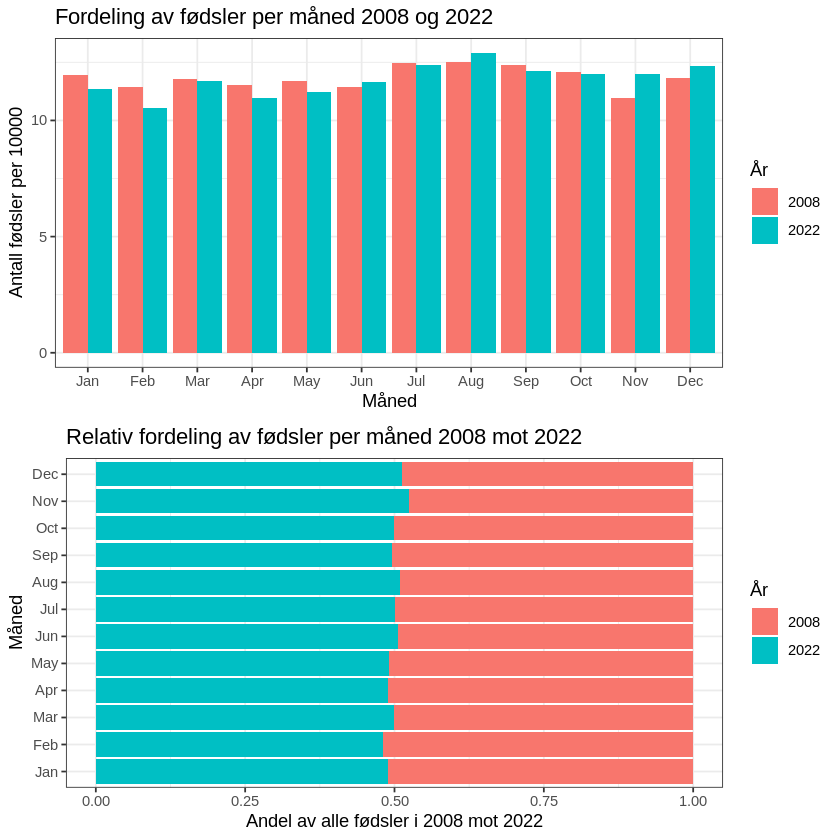

In [13]:
# Stolpediagram

df <- read_feather(
  "df.feather", columns = c("DOB_MM", "DOB_YY")
  )
df <- df %>%
  group_by(DOB_YY) %>%
  count(DOB_MM)%>%
  mutate(REL_N = (n / sum(n))) %>% # Finner den relative andelen fødsler
  ungroup() # Først teller jeg over for å se om det er noen rare eller manglende verdier i denne kolonnen - det er det ikke -, og så regner jeg den relative

#df <- df %>% mutate(DOB_MM = month.abb[as.numeric(DOB_MM)]) # Endrer tallene på månedene til Navn, men jeg måtte likevel arrangere dem så lot være å bruke den

months <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec") # Jeg legger inn navnene på månedene, gjør det på engelsk for å unngå eventuelle problemer med æ, ø ,å
num <- c("01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12")
df$DOB_MM <-  replace(df$DOB_MM, df$DOB_MM %in% num, months)

# Lager grafene
fig1 <- df %>%
ggplot()+
geom_col(
  aes(x = DOB_MM, y = n/10000, fill = factor(DOB_YY)), # Deler n på 10000 for å gjøre forskjellene litt mer synlige
  position = "dodge")+ #Stolpene står ved siden av hverandre
labs(
title = "Fordeling av fødsler per måned 2008 og 2022",
  x = "Måned",
  y = "Antall fødsler per 10000",
  fill = "År"
)+
scale_x_discrete(
limits = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec") # Arrangerer månedene kronologisk
)+
  theme_bw()

fig2 <- df %>%
ggplot()+
geom_col(
  aes(y = DOB_MM, x = REL_N, fill = factor(DOB_YY)),
  position = "fill" # Her velger jeg å legge sammen 2008 og 2022 til 1 så man kan se den relative forskjellen mellom årene litt tydeligere
)+
labs(
title = "Relativ fordeling av fødsler per måned 2008 mot 2022",
  y = "Måned",
  x = "Andel av alle fødsler i 2008 mot 2022",
  fill = "År"
)+
scale_y_discrete(
limits = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
)+
theme_bw()

ggarrange(fig1, fig2, nrow = 2) # Setter figurene sammen i samme bilde

Siden det står i oppgaven at hensikten er å sammenligne tallene fra de to årene mot hverandre velger jeg å representere den relative fordelingen slik.

### Figur 2
Du skal lage en figur som viser fordelingen av fødsler per ukedag. Du skal også legge til
et informasjonslag som viser den relative fordelingen av fødsler per ukedag.

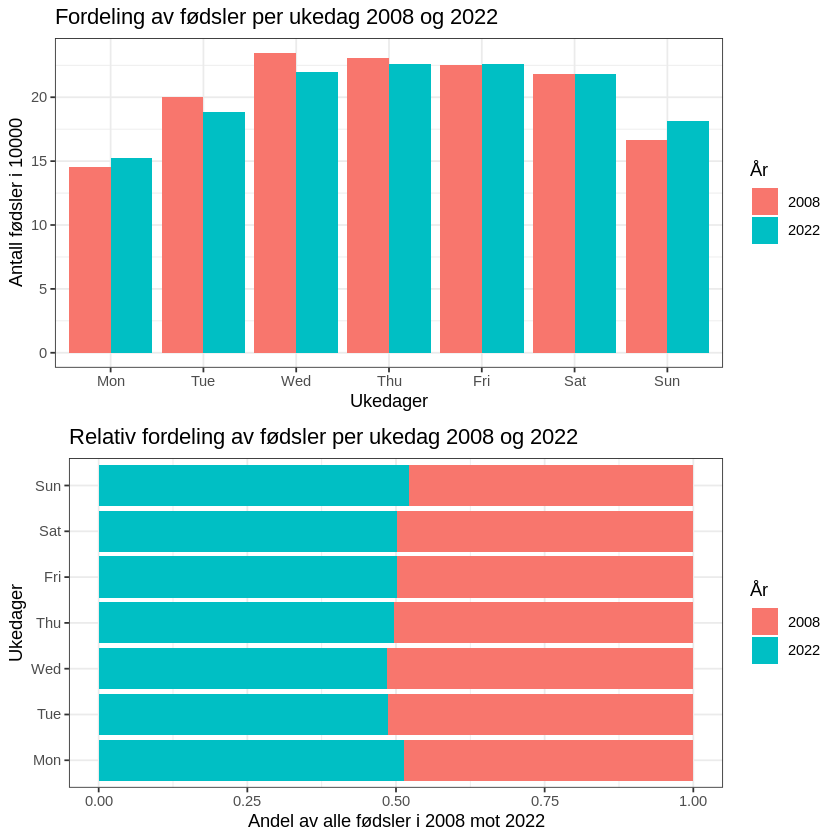

In [14]:
# Jeg kan bruke en stor del av den samme koden som i forrige oppgave

df <- read_feather(
  "df.feather", columns = c("DOB_WK", "DOB_YY")
  )
df <- df %>%
  group_by(DOB_YY) %>%
  count(DOB_WK)%>%
  mutate(REL_N = (n / sum(n))) %>% # Finner den relative andelen fødsler
  ungroup()


days <- c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun") # Jeg legger inn navnene på dagene, gjør det på engelsk for å unngå eventuelle problemer med æ, ø ,å
num <- c(1, 2, 3, 4, 5, 6, 7)
df$DOB_WK <-  replace(df$DOB_WK, df$DOB_WK %in% num, days) #erstatter tallene for dager med forkortelsene

# Lager grafene
fig1 <- df %>%
ggplot()+
geom_col(
  aes(x = DOB_WK, y = n/10000, fill = factor(DOB_YY)), # Deler n på 10000 for å gjøre forskjellene litt mer synlige
  position = "dodge")+ #Årene står ved siden av hverandre
labs(
title = "Fordeling av fødsler per ukedag 2008 og 2022",
  x = "Ukedager",
  y = "Antall fødsler i 10000",
  fill = "År"
)+
scale_x_discrete(
limits = c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun") # Arrangerer fagene fra man til Søn
)+
  theme_bw()

fig2 <- df %>%
ggplot()+
geom_col(
  aes(y = DOB_WK, x = REL_N, fill = factor(DOB_YY)),
  position = "fill" # Her velger jeg å legge sammen 2008 og 2022 til 1 så man kan se den relative forskjellen mellom årene litt tydeligere
)+
labs(
title = "Relativ fordeling av fødsler per ukedag 2008 og 2022",
  y = "Ukedager",
  x = "Andel av alle fødsler i 2008 mot 2022",
  fill = "År"
)+
scale_y_discrete(
limits = c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun")
)+
theme_bw()

ggarrange(fig1, fig2, nrow = 2) # Setter figurene sammen i samme bilde

### Figur 3
Du skal lage en figur som viser fordelingen av fødsler per tidspunkt på døgnet. Du
skal også legge til et informasjonslag som viser den relative fordelingen av fødsler per
tidspunkt på døgnet.

Her har jeg da kun tall fra 2022

In [51]:
df <- read_feather(
  "df.feather", columns = c("DOB_TT", "DOB_YY") #Henter ut rette kolonner
  )
df <- df %>%
  group_by(DOB_YY) %>%
  count(DOB_TT)%>%
  filter(!is.na(DOB_TT), DOB_TT != 9999) %>% # tar ikke med 2008 (siden alle er NA), og det står i dokumentasjonen at 9999 er synonymt med mangel eller ingen info
  mutate(REL_N = (n / sum(n))) %>% # Finner den relative andelen fødsler
  ungroup()

In [52]:
df1 <- df %>% #Gjør tidspunktene om til desimaler
  mutate(
    hour = as.numeric(substr(DOB_TT, 1, 2)),
    minute = as.numeric(substr(DOB_TT, 3, 4)) / 60,
    decimal_hour = hour + minute
  )

In [66]:
fig1 <- df1 %>%
  select(c("decimal_hour", "n", "DOB_YY")) %>%
  ggplot(aes(x = decimal_hour, y = n) ) +
  geom_point()+
  scale_x_continuous(name = "Time for Time", breaks = 0:23, limits = c(0, 24))+
  labs(
    title = "Fordeling av fødsler per time i 2022",
    y = "Fødsler"
)+
theme_minimal()

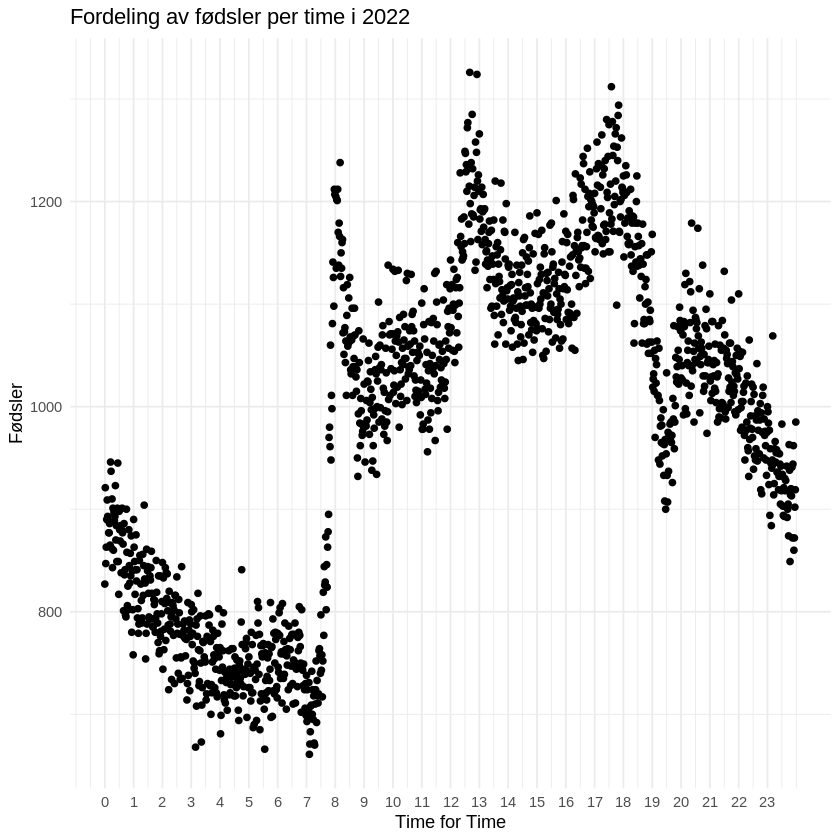

In [67]:
fig1

### Figur 4
Du skal lage en figur som viser fordelingen av fødsler per alder på mor.

In [68]:

df <- read_feather(
  "df.feather", columns = c("MAGER", "MAGER9", "DOB_YY")
  )
df <- df %>%
  group_by(DOB_YY) %>%
  count(MAGER)%>%
  mutate(REL_N = (n / sum(n))) %>% # Finner den relative andelen fødsler
  ungroup() # Først teller jeg over for å se om det er noen rare eller manglende verdier i denne kolonnen - det er det ikke -, og så regner jeg den relative


In [69]:
# Lager grafene
fig1 <- df %>%
ggplot()+
geom_col(
  aes(x = MAGER, y = n, fill = factor(DOB_YY)), # Deler n på 10000 for å gjøre forskjellene litt mer synlige
  position = "dodge")+ #Årene står ved siden av hverandre
labs(
title = "Fordeling av fødsler per alder på mor 2008 og 2022",
  x = "Alder",
  y = "Antall fødsler",
  fill = "År"
)+
theme_bw()


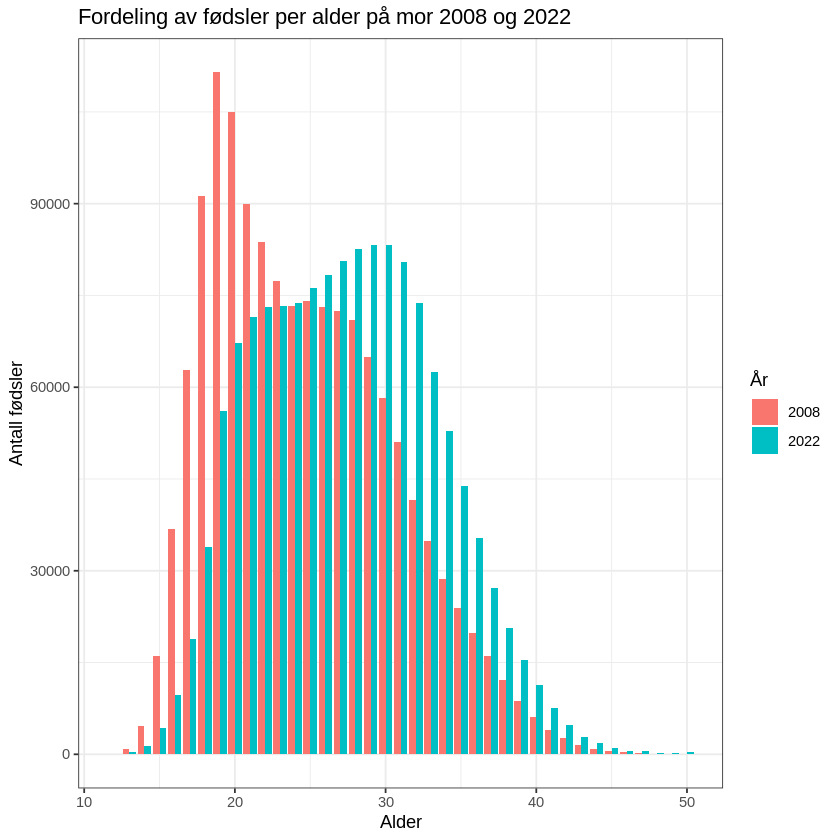

In [70]:
fig1

### Figur 5
Du skal lage en figur som viser fordelingen av fødsler per alder på far.

In [71]:

df <- read_feather(
  "df.feather", columns = c("FAGECOMB", "DOB_YY")
  )
df <- df %>%
  filter (FAGECOMB != 99) %>%
  group_by(DOB_YY) %>%
  count(FAGECOMB)%>%
  mutate(REL_N = (n / sum(n))) %>% # Finner den relative andelen fødsler
  ungroup() # Først teller jeg over for å se om det er noen rare eller manglende verdier i denne kolonnen - det er det ikke -, og så regner jeg den relative


In [72]:
# Lager grafene
fig1 <- df %>%
ggplot()+
geom_col(
  aes(x = FAGECOMB, y = n, fill = factor(DOB_YY)), # Deler n på 10000 for å gjøre forskjellene litt mer synlige
  position = "dodge")+ #Årene står ved siden av hverandre
labs(
title = "Fordeling av fødsler per alder på far 2008 og 2022",
  x = "Alder",
  y = "Antall fødsler",
  fill = "År"
)+
theme_bw()


In [79]:
# Fikk lyst til å se litt nærmere på denne
fig2 <- df %>%
ggplot()+
geom_col(
  aes(x = FAGECOMB, y = n, fill = factor(DOB_YY)), # Deler n på 10000 for å gjøre forskjellene litt mer synlige
  position = "dodge")+ #Årene står ved siden av hverandre
labs(
title = "Fordeling av fødsler per alder på far 2008 og 2022",
  x = "Alder",
  y = "Antall fødsler",
  fill = "År"
)+
  scale_x_continuous(limits = c(15,65))+
theme_bw()

Warning message:
“Removed 46 rows containing missing values (`geom_col()`).”


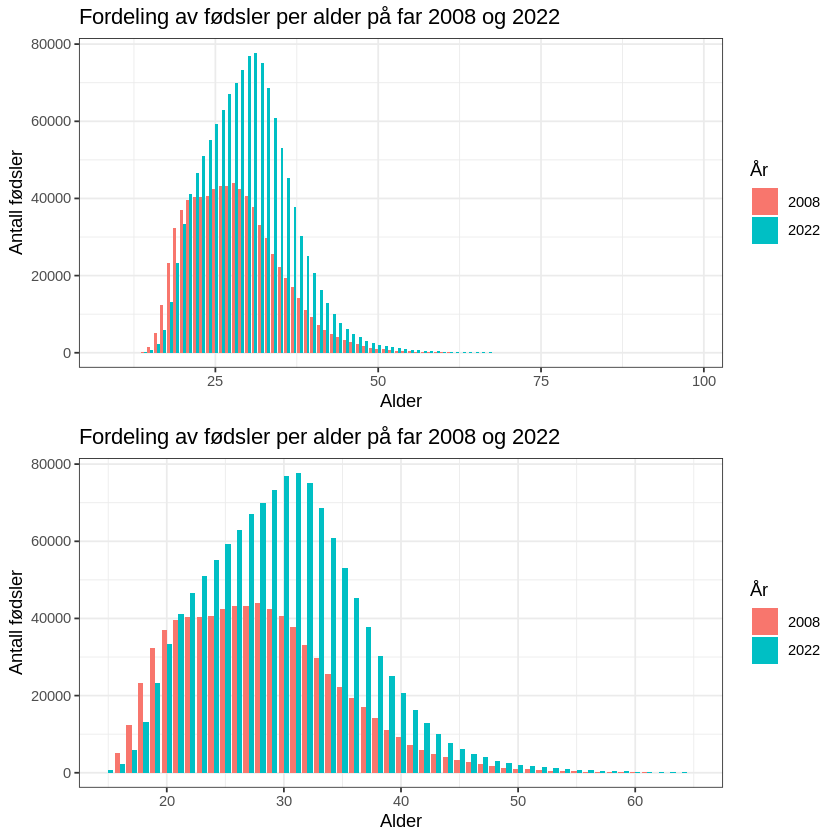

In [81]:
ggarrange(fig1, fig2, nrow = 2) # Setter figurene sammen i samme bilde

### Figur 6
Du skal lage en figur som viser mors og fars alder ved fødsel. Du skal også legge til et
informasjonslag som viser gjennomsnittet av mors og fars alder ved fødsel.

In [95]:

df <- read_feather(
  "df.feather", columns = c("FAGECOMB", "MAGER", "DOB_YY")
  )
df <- df %>%
  filter (FAGECOMB != 99) %>%
  group_by(DOB_YY) %>%
  mutate(MED_MF = ((FAGECOMB + MAGER) / 2)) %>% # Finner den relative andelen fødsler
  ungroup() # Først teller jeg over for å se om det er noen rare eller manglende verdier i denne kolonnen - det er det ikke -, og så regner jeg den relative


In [93]:
# Lager grafene
fig1 <- df %>%
ggplot()+
geom_bar(
  aes(x = MED_MF,  fill = factor(DOB_YY)), # Deler n på 10000 for å gjøre forskjellene litt mer synlige
  position = "dodge")+ #Årene står ved siden av hverandre
labs(
title = "Fordeling av fødsler per gjennomsnittelig alder på mor og far 2008 og 2022",
  x = "Alder",
  y = "Antall fødsler",
  fill = "År"
)+
theme_bw()


In [ ]:
# Lager grafene
fig2 <- df %>%
ggplot(aes(fill = as.factor(DOB_YY)))+
geom_point(
  aes(x = FAGECOMB,  y = MAGER, size = MED_MF))+ #Årene står ved siden av hverandre
labs(
title = "Fordeling av fødsler per gjennomsnittelig alder på mor og far 2008 og 2022",
  x = "Fars alder",
  y = "Mors alder",
  fill = "År"
)+
theme_bw()

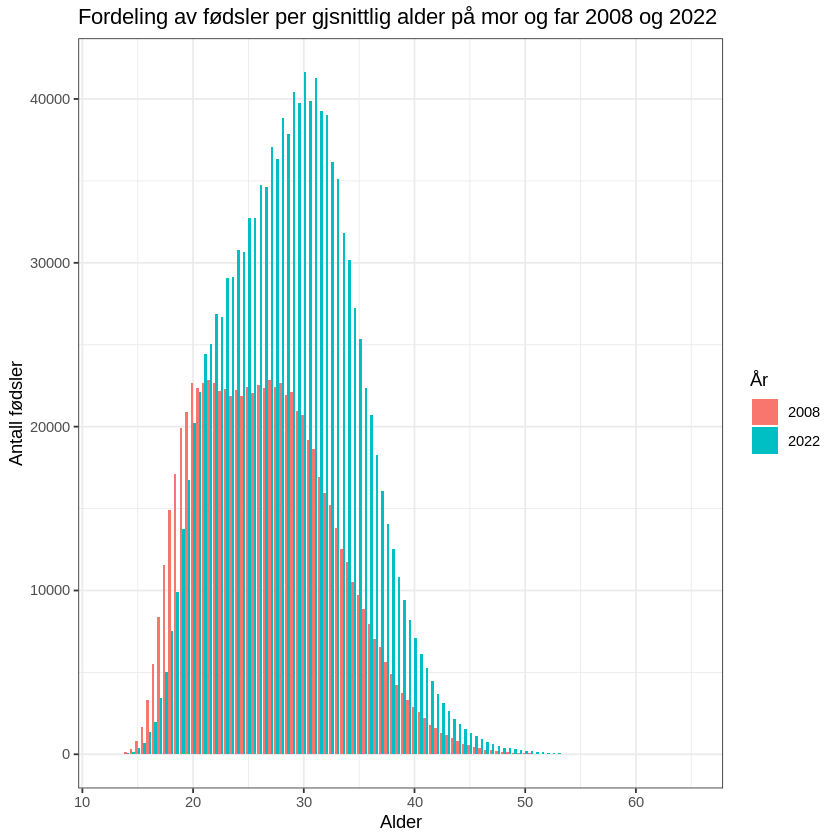

In [86]:
fig1

In [ ]:
fig2

### Figur 7
Du skal lage en figur som viser gjennomsnittlig fødselsvekt per kjønn.

In [ ]:
df <- read_feather(
  "df.feather", columns = c("SEX", "DBWT", "DOB_YY")
  )

df1 <- df %>%
  filter (DBWT != 9999) %>% #Fjerner de med vekt 9999 da disse er "udefinert"
  summarise(mean = mean(as.numeric(DBWT)),  n = n(), .by = c(DOB_YY, SEX))


In [ ]:
# Lager grafene
fig1 <- df1 %>%
ggplot()+
geom_col(
  aes(x = SEX,  y = mean, fill = as.factor(DOB_YY)), # Deler n på 10000 for å gjøre forskjellene litt mer synlige
  position = "dodge")+ #Årene står ved siden av hverandre
labs(
title = "Gjennomsnittelig fødselsvekt per kjønn 2008 og 2022",
  y = "Vekt",
  x = "Kjønn",
  fill = "År"
)+
theme_bw()

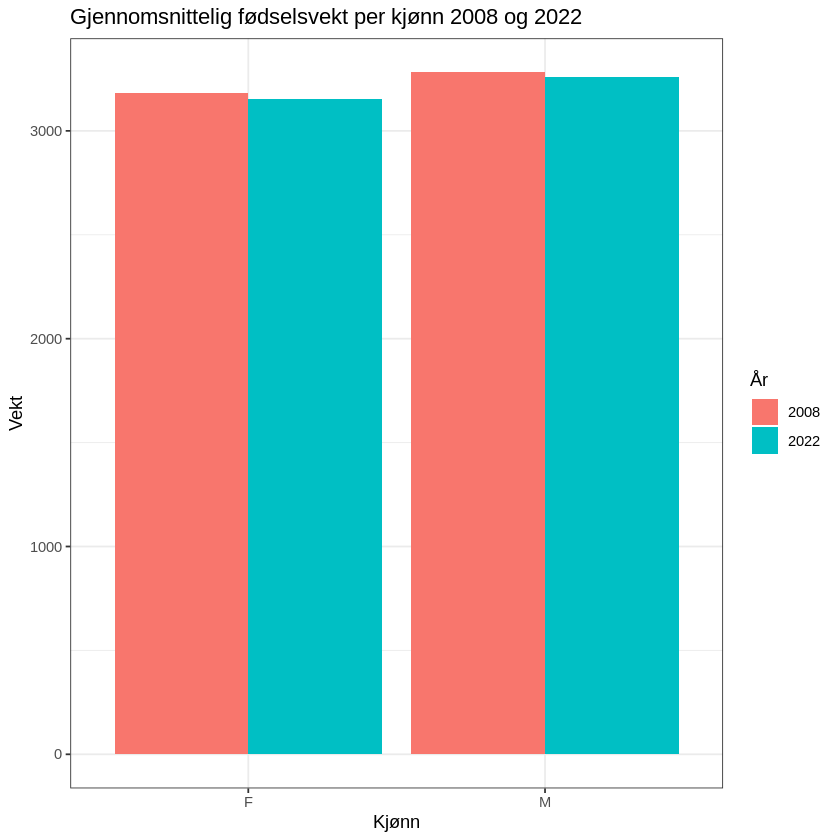

In [ ]:
fig1

##Tabeller

###Tabell 1
Du skal lage en tabell som viser fordelingen av fødsler per utdannelse på mor.

In [18]:
library(knitr)

In [ ]:
df <- read_feather(
  "df.feather", columns = c("MEDUC", "DOB_YY")
  )

In [ ]:
df %>%
  group_by(DOB_YY) %>%
  count(MEDUC)

DOB_YY,MEDUC,n
<dbl>,<dbl>,<int>
2008,1,33920
2008,2,158461
2008,3,236495
2008,4,176632
2008,5,57935
2008,6,164983
2008,7,66968
2008,8,19033
2008,9,11664


In [ ]:
# Fjerner NA
df1 <- df %>%
  filter(!is.na(MEDUC)) %>%
  group_by(DOB_YY) %>%
  count(MEDUC)

In [ ]:
educ <- c("8th grade or less", "9th through 12th grade with no diploma", "High school graduate or GED completed", "Some college credit, but not a degree", "Associate degree (AA,AS)", "Bachelor’s degree (BA, AB, BS)", "Master’s degree (MA, MS, MEng, MEd, MSW, MBA)", "Doctorate (PhD, EdD), Professional Degree (MD, DDS,
DVM, LLB, JD)", "Unknown") # Jeg legger inn navnene på utdanningsnivåene så tabellen ser litt finere ut, jeg velger også å beholde 9 = Unkonown fordi dette er en tabell og den ikke kan ditrupte noe visualisering
num <- c(1, 2, 3, 4, 5, 6, 7, 8, 9)
df1$MEDUC <-  replace(df1$MEDUC, df1$MEDUC %in% num, educ) #erstatter tallene for dager med forkortelsene

In [ ]:
knitr::kable(df1, col.names = c("Year", "Mothers educational level", "Total Births"))



| Year|Mothers educational level                                        | Total Births|
|----:|:----------------------------------------------------------------|------------:|
| 2008|8th grade or less                                                |        33920|
| 2008|9th through 12th grade with no diploma                           |       158461|
| 2008|High school graduate or GED completed                            |       236495|
| 2008|Some college credit, but not a degree                            |       176632|
| 2008|Associate degree (AA,AS)                                         |        57935|
| 2008|Bachelor’s degree (BA, AB, BS)                                   |       164983|
| 2008|Master’s degree (MA, MS, MEng, MEd, MSW, MBA)                    |        66968|
| 2008|Doctorate (PhD, EdD), Professional Degree (MD, DDS,
DVM, LLB, JD) |        19033|
| 2008|Unknown                                                          |        11664|
| 2022|8th grade or less     

###Tabell 2
Du skal lage en tabell som viser fordelingen av fødsler per utdannelse på far.

In [ ]:
df <- read_feather(
  "df.feather", columns = c("FEDUC", "DOB_YY")
  )

In [ ]:
# Fjerner NA, og 9 siden 9 er unknown
df1 <- df %>%
  filter(!is.na(FEDUC)) %>%
  group_by(DOB_YY) %>%
  count(FEDUC)

In [ ]:
educ <- c("8th grade or less", "9th through 12th grade with no diploma", "High school graduate or GED completed", "Some college credit, but not a degree", "Associate degree (AA,AS)", "Bachelor’s degree (BA, AB, BS)", "Master’s degree (MA, MS, MEng, MEd, MSW, MBA)", "Doctorate (PhD, EdD), Professional Degree (MD, DDS,
DVM, LLB, JD)", "Unknown") # Jeg legger inn navnene på utdanningsnivåene så tabellen ser litt finere ut, jeg velger også å beholde 9 = Unkonown fordi dette er en tabell og den ikke kan ditrupte noe visualisering
num <- c(1, 2, 3, 4, 5, 6, 7, 8, 9)
df1$FEDUC <-  replace(df1$FEDUC, df1$FEDUC %in% num, educ) #erstatter tallene for dager med forkortelsene

In [ ]:
knitr::kable(df1, col.names = c("Year", "Fathers educational level", "Total Births"))



| Year|Fathers educational level                                        | Total Births|
|----:|:----------------------------------------------------------------|------------:|
| 2022|8th grade or less                                                |        23758|
| 2022|9th through 12th grade with no diploma                           |        82603|
| 2022|High school graduate or GED completed                            |       362571|
| 2022|Some college credit, but not a degree                            |       215434|
| 2022|Associate degree (AA,AS)                                         |        91133|
| 2022|Bachelor’s degree (BA, AB, BS)                                   |       292207|
| 2022|Master’s degree (MA, MS, MEng, MEd, MSW, MBA)                    |       108058|
| 2022|Doctorate (PhD, EdD), Professional Degree (MD, DDS,
DVM, LLB, JD) |        46632|
| 2022|Unknown                                                          |       189109|

###Tabell 3
Du skal lage en tabell som viser fordelingen av fødsler per sivilstatus på mor.

In [ ]:
df <- read_feather(
  "df.feather", columns = c("DMAR", "DOB_YY")
  )
  df1 <- df %>%
  filter(!is.na(DMAR)) %>%
  group_by(DOB_YY) %>%
  count(DMAR)

In [ ]:
siv <- c("Married", "Not Married") # Jeg legger inn navnene på utdanningsnivåene så tabellen ser litt finere ut, jeg velger også å beholde 9 = Unkonown fordi dette er en tabell og den ikke kan ditrupte noe visualisering
num <- c(1, 2)
df1$DMAR <-  replace(df1$DMAR, df1$DMAR %in% num, siv) #erstatter tallene for dager med forkortelsene

In [ ]:
knitr::kable(df1, col.names = c("Year", "Mothers Marital Status", "Total Births"))



| Year|Mothers Marital Status | Total Births|
|----:|:----------------------|------------:|
| 2008|Married                |       731185|
| 2008|Not Married            |       689592|
| 2022|Married                |       696576|
| 2022|Not Married            |       548340|

###Tabell 4
Du skal lage en tabell som viser hvor mye mor røykte før og under svangerskapet.

In [53]:
df <- read_feather(
  "df.feather", columns = c("CIG_0", "CIG_1", "CIG_2", "CIG_3", "DOB_YY")
  )

In [57]:
df1 <- df %>% group_by(DOB_YY) %>% mutate(Before = as.numeric(CIG_0), During = as.numeric(CIG_1) + as.numeric(CIG_2) + as.numeric(CIG_3))

In [67]:
df2 <- df1 %>%
  select(c("DOB_YY", "Before", "During")) %>%
  group_by(DOB_YY) %>%
  filter(!is.na(Before))


In [68]:
df2

DOB_YY,Before,During
<dbl>,<dbl>,<dbl>
2022,0,0
2022,5,0
2022,0,0
2022,0,0
2022,0,0
2022,0,0
2022,0,0
2022,0,0
2022,0,0


###Tabell 5
Du skal lage en tabell som viser gjennomsnittlig fødselsvekt per antall sigaretter mor
røykte per dag under svangerskapet.

In [ ]:
relig_income %>%
  pivot_longer(!religion, names_to = "income", values_to = "count")

In [77]:
df <- read_feather(
  "df.feather", columns = c("CIG_1", "CIG_2", "CIG_3", "DBWT", "DOB_YY")
  )
df1 <- df %>% mutate(SMOKE = sum(CIG_1 + CIG_2 + CIG_3))


ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `SMOKE = sum(CIG_1 + CIG_2 + CIG_3)`.
[1mCaused by error in `CIG_1 + CIG_2`:[22m
[33m![39m non-numeric argument to binary operator


In [ ]:
  pivot_longer(!c(DBWT, DOB_YY), names_to = "SMOKE", values_to = "val")
df1 <- df1 %>% group_by(DOB_YY) %>%

In [74]:
df1

DBWT,DOB_YY,SMOKE,val
<chr>,<dbl>,<chr>,<chr>
3203,2022,CIG_1,00
3203,2022,CIG_2,00
3203,2022,CIG_3,00
3000,2022,CIG_1,00
3000,2022,CIG_2,00
3000,2022,CIG_3,00
3540,2022,CIG_1,00
3540,2022,CIG_2,00
3540,2022,CIG_3,00
